In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('C:/Users/PARTH ATHALYE/Desktop/Laptop price predictor/laptop_pricing.csv', encoding = 'unicode_escape')
data

,ï»¿Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4,1000,0,0,15.6,45141
2,HP,3,7,2.30,8,256,256,0,14.0,35999
3,ASUS,3,7,2.30,4,1000,0,0,14.0,39990
4,HP,3,7,2.40,4,1000,0,0,15.6,36263
5,HP,2,4,2.30,4,500,256,0,14.0,26403
6,Lenovo,3,7,2.30,4,1000,0,0,15.6,38290
7,HP,5,8,1.60,8,1000,0,0,14.0,53554
8,Lenovo,1,3,1.80,4,1000,0,0,15.6,29990
9,Dell,3,8,3.90,4,1000,0,0,14.0,38090


In [5]:
data.columns

Index(['ï»¿Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)', 'Price'],
      dtype='object')

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['ï»¿Manufacturer'] = data['ï»¿Manufacturer'].astype('|S')
data['ï»¿Manufacturer'] = label_encoder.fit_transform(data['ï»¿Manufacturer'])

In [12]:
variables = data[['ï»¿Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif


,VIF,Features
0,4.830255,ï»¿Manufacturer
1,40.647852,IntelCore(i-)
2,74.128093,IntelCoreGen
3,37.604507,processing speed(GHz)
4,7.636092,Ram(gb)
5,65.612904,HDD(gb)
6,4.828394,SSD(gb)
7,9.230363,Graphics(gb)
8,110.209476,ScreenSize(inch)


In [13]:
updated_data = data.drop(['IntelCore(i-)','IntelCoreGen','processing speed(GHz)','HDD(gb)','ScreenSize(inch)'], axis=1)
updated_data

,ï»¿Manufacturer,Ram(gb),SSD(gb),Graphics(gb),Price
0,1,4,0,0,39057
1,1,4,0,0,45141
2,2,8,256,0,35999
3,0,4,0,0,39990
4,2,4,0,0,36263
5,2,4,256,0,26403
6,3,4,0,0,38290
7,2,8,0,0,53554
8,3,4,0,0,29990
9,1,4,0,0,38090


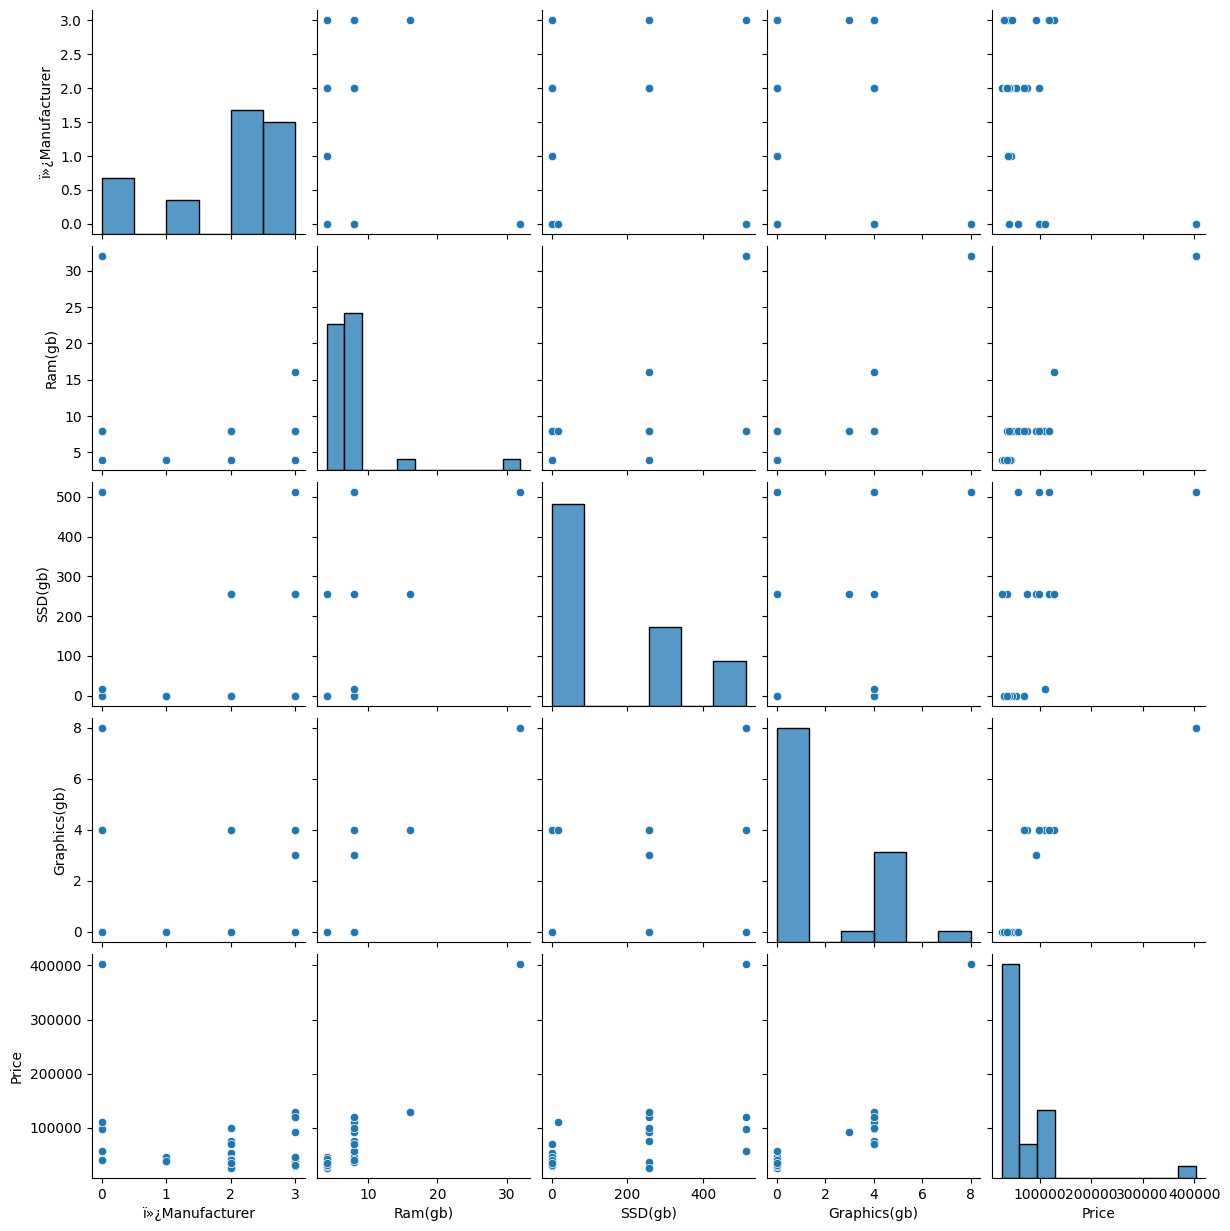

In [14]:
sb.pairplot(updated_data)

In [15]:
data = updated_data.values
x,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [16]:
RFR_model = RandomForestRegressor(random_state=0)
RFR_model.fit(x, y)

RandomForestRegressor(random_state=0)

In [17]:
y_pred = RFR_model.predict(X_test)

In [18]:
r2_score(y_test, y_pred)

0.9879177200463668